### **Import Library**

In [18]:
# import sys
# import pkg_resources

# def get_package_version(package_name):
#     """Mencari versi paket yang terinstal."""
#     try:
#         return pkg_resources.get_distribution(package_name).version
#     except pkg_resources.DistributionNotFound:
#         return "Tidak terinstal"
#     except Exception as e:
#         return f"Error: {e}"

# # Daftar paket sesuai requirements.txt Anda
# packages_to_check = [
#     'streamlit',
#     'streamlit-option-menu',
#     'streamlit-antd-components',
#     'streamlit-shadcn-ui',
#     'tensorflow',
#     'pandas',
#     'numpy',
#     'scikit-learn',
#     'Pillow',
#     'plotly',
#     'openpyxl',
#     'matplotlib',
#     'seaborn',
#     'networkx'
# ]

# # Mencetak versi Python
# print("-" * 30)
# print(f"Versi Python: {sys.version.split()[0]}")
# print("-" * 30)

# # Mencetak versi setiap paket
# print("Versi Pustaka (Library):")
# for pkg in sorted(packages_to_check, key=str.lower):
#     version = get_package_version(pkg)
#     # Mencetak dengan format yang rapi
#     print(f"{pkg:<25} : {version}")

# print("-" * 30)

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf # Untuk mengatur seed demi reproducibility
import plotly.express as px
import matplotlib.pyplot as plt
import os

### **Import Data Hasil Rules**

In [20]:
df = pd.read_csv('D:/kuliah/PA/sakinah-mart/data/rules2023.csv')
df.head()

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'HARMONY MELON', 'HARMONY LEMON', '...",frozenset({'HARMONY STRAWBERY'}),0.000113,1,1235.260000
1,1,"frozenset({'DELFI TOP TRIP/CHO 9GR', 'MOMOGI J...",frozenset({'MOMOGI CKL 6GR'}),0.000113,1,686.255556
2,2,"frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000113,1,571.879630
3,3,"frozenset({'CLOUD 9 VANILA 15 4G', 'INDOMILK K...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000146,1,571.879630
4,4,"frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000146,1,571.879630


In [21]:
# Pastikan semua elemen dalam kolom antecedents dan consequents adalah frozenset
df["antecedents"] = df["antecedents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)
df["consequents"] = df["consequents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)

# Mengambil semua item unik
all_items = set()
for col in ["antecedents", "consequents"]:
    for items in df[col]:
        all_items.update(items)

all_items

{'BIG BLUEBRRY 375ML',
 'CIPTADENT PG FRS 190ML',
 'CLOUD 9 CHOCO 15 4G',
 'CLOUD 9 VANILA 15 4G',
 'DELFI TOP TRIP/CHO 9GR',
 'EKONOMI E900K',
 'HARMONY LEMON',
 'HARMONY MELON',
 'HARMONY ORANGE',
 'HARMONY STRAWBERY',
 'HERS PROT SCM 60 S',
 'INDOMIE AYAM BAWANG',
 'INDOMIE AYAM SPECIAL',
 'INDOMIE GRG SPECIAL',
 'INDOMIE SOTO MIE',
 'INDOMILK KID CKL 115ML',
 'INDOMILK KID STR 115ML',
 'INDOMILK KID VNL 115ML',
 'INDOMILK STR 190ML BTL',
 'KRIPIK SGKG TURBO 180G',
 'MOMOGI CKL 6GR',
 'MOMOGI JGG BKR 6GR',
 'NUVO SOAP BLUE 72G',
 'NUVO SOAP YLOW 72G',
 'OREO SOFT CAKE 16GR',
 'PARAMEX SKT KEPALA',
 'PUCUK HARUM TEH 350ML',
 'ROMA KELAPA 300GR',
 'SUNSILK SHP BLK SHN 160ML',
 'TEH GELAS ORI 170ML',
 'TONGTJI JASMINE 5 S',
 'TWISTER MINI CPP 20GR',
 'WAFELLO COCONUT 37 5G',
 'WALLS POPULAIRE STR',
 'YA KOPI SPESIAL 60GR'}

### **Import Data Transaksi**

In [22]:
groceries = pd.read_excel('D:/kuliah/PA/sakinah-mart/data/final_data2023.xlsx')
groceries.head()

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
0,2023-01-01,2301011000001,FORVITA MARG 200GR,2
1,2023-01-01,2301011000002,SASA SANTAN KLPA 65ML,3
2,2023-01-01,2301011000003,CHEERS 1500ML GREEN,1
3,2023-01-01,2301011000004,SUN KARA 65ML,1
4,2023-01-01,2301011000004,OREO PIKACHU 165 6GR,1


### **Filter Data Transaksi**

In [23]:
df_filtered = groceries[groceries['NAMA BARANG'].isin(all_items)]
df_filtered 

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
9,2023-01-01,2301011000008,OREO SOFT CAKE 16GR,2
34,2023-01-01,2301011000018,PUCUK HARUM TEH 350ML,6
62,2023-01-01,2301011000034,ROMA KELAPA 300GR,1
96,2023-01-01,2301011000040,INDOMIE AYAM BAWANG,1
100,2023-01-01,2301011000041,YA KOPI SPESIAL 60GR,1
...,...,...,...,...
162895,2023-12-31,2312311020095,INDOMIE GRG SPECIAL,4
162902,2023-12-31,2312311020096,INDOMIE GRG SPECIAL,4
162944,2023-12-31,2312311020102,INDOMIE GRG SPECIAL,2
162946,2023-12-31,2312311020102,INDOMIE SOTO MIE,2


In [24]:
# Menampilkan jumlah unik nama barang
jumlah_nama_barang = df_filtered['NAMA BARANG'].nunique()
print("Jumlah nama barang unik:", jumlah_nama_barang)

# Menampilkan isi nama barang yang unik
nama_barang_unik = df_filtered['NAMA BARANG'].unique()
print("Nama barang unik:")
for nama in nama_barang_unik:
    print("-", nama)

Jumlah nama barang unik: 35
Nama barang unik:
- OREO SOFT CAKE 16GR
- PUCUK HARUM TEH 350ML
- ROMA KELAPA 300GR
- INDOMIE AYAM BAWANG
- YA KOPI SPESIAL 60GR
- INDOMILK KID CKL 115ML
- INDOMILK STR 190ML BTL
- EKONOMI E900K
- INDOMILK KID STR 115ML
- TWISTER MINI CPP 20GR
- INDOMIE GRG SPECIAL
- INDOMIE AYAM SPECIAL
- WALLS POPULAIRE STR
- MOMOGI CKL 6GR
- HARMONY ORANGE
- HARMONY LEMON
- NUVO SOAP BLUE 72G
- NUVO SOAP YLOW 72G
- TONGTJI JASMINE 5 S
- INDOMIE SOTO MIE
- MOMOGI JGG BKR 6GR
- PARAMEX SKT KEPALA
- KRIPIK SGKG TURBO 180G
- SUNSILK SHP BLK SHN 160ML
- BIG BLUEBRRY 375ML
- HARMONY STRAWBERY
- HERS PROT SCM 60 S
- TEH GELAS ORI 170ML
- DELFI TOP TRIP/CHO 9GR
- CLOUD 9 CHOCO 15 4G
- CLOUD 9 VANILA 15 4G
- HARMONY MELON
- CIPTADENT PG FRS 190ML
- WAFELLO COCONUT 37 5G
- INDOMILK KID VNL 115ML


### **Agregasi Data Mingguan**

In [25]:
# Agregasi jumlah QTY per tanggal dan nama barang
df_grouped = df_filtered.groupby(['TANGGAL', 'NAMA BARANG'], as_index=False)['QTY'].sum()

tanggal_range = pd.date_range(start='2023-01-01', end='2023-12-31')
all_items = df_filtered['NAMA BARANG'].unique()

# Buat kombinasi semua tanggal dan item
multi_index = pd.MultiIndex.from_product([tanggal_range, all_items], names=['TANGGAL', 'NAMA BARANG'])
all_combinations = pd.DataFrame(index=multi_index).reset_index()

# Gabungkan dengan hasil groupby
df_joined = pd.merge(all_combinations, df_grouped, on=['TANGGAL', 'NAMA BARANG'], how='left')
df_joined['QTY'] = df_joined['QTY'].fillna(0)

# Pastikan TANGGAL dalam datetime
df_joined['TANGGAL'] = pd.to_datetime(df_joined['TANGGAL'])

# Urutkan dulu datanya
df_joined = df_joined.sort_values('TANGGAL')

# Ambil tanggal paling awal
start_date = df_joined['TANGGAL'].min()

# Hitung minggu ke-n secara manual (tiap 7 hari)
df_joined['WEEK_NUMBER'] = ((df_joined['TANGGAL'] - start_date).dt.days // 7) + 1

# Agregasi berdasarkan minggu dan nama barang
df_weekly = df_joined.groupby(['WEEK_NUMBER', 'NAMA BARANG'], as_index=False)['QTY'].sum()

# (Opsional) Tambahkan kolom tanggal mulai minggu
df_weekly['TANGGAL'] = start_date + pd.to_timedelta((df_weekly['WEEK_NUMBER'] - 1) * 7, unit='D')

# Visualisasi
fig = px.line(df_weekly, x='TANGGAL', y='QTY', color='NAMA BARANG',
              title='Jumlah Penjualan per Minggu (Setiap 7 Hari)')
fig.update_layout(legend_title_text='Klik untuk tampilkan/sembunyikan item')
fig.show()

In [26]:
df_weekly

,WEEK_NUMBER,NAMA BARANG,QTY,TANGGAL
0,1,BIG BLUEBRRY 375ML,1.0,2023-01-01
1,1,CIPTADENT PG FRS 190ML,0.0,2023-01-01
2,1,CLOUD 9 CHOCO 15 4G,0.0,2023-01-01
3,1,CLOUD 9 VANILA 15 4G,0.0,2023-01-01
4,1,DELFI TOP TRIP/CHO 9GR,0.0,2023-01-01
...,...,...,...,...
1850,53,TONGTJI JASMINE 5 S,0.0,2023-12-31
1851,53,TWISTER MINI CPP 20GR,0.0,2023-12-31
1852,53,WAFELLO COCONUT 37 5G,1.0,2023-12-31
1853,53,WALLS POPULAIRE STR,0.0,2023-12-31


### **Pivot Data**

In [27]:
df_pivoted= df_weekly.pivot(index='TANGGAL', columns='NAMA BARANG', values='QTY')
df_pivoted.columns.name = None  # hilangkan nama kolom atas
df_pivoted = df_pivoted.reset_index() 
df_pivoted

,TANGGAL,BIG BLUEBRRY 375ML,CIPTADENT PG FRS 190ML,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,DELFI TOP TRIP/CHO 9GR,EKONOMI E900K,HARMONY LEMON,HARMONY MELON,HARMONY ORANGE,...,PARAMEX SKT KEPALA,PUCUK HARUM TEH 350ML,ROMA KELAPA 300GR,SUNSILK SHP BLK SHN 160ML,TEH GELAS ORI 170ML,TONGTJI JASMINE 5 S,TWISTER MINI CPP 20GR,WAFELLO COCONUT 37 5G,WALLS POPULAIRE STR,YA KOPI SPESIAL 60GR
0,2023-01-01,1.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,3.0,...,3.0,65.0,11.0,1.0,2.0,7.0,6.0,0.0,20.0,4.0
1,2023-01-08,2.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,4.0,52.0,2.0,1.0,2.0,1.0,3.0,0.0,5.0,2.0
2,2023-01-15,4.0,0.0,0.0,0.0,4.0,2.0,3.0,0.0,0.0,...,0.0,41.0,5.0,1.0,0.0,0.0,1.0,0.0,8.0,3.0
3,2023-01-22,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,31.0,7.0,0.0,0.0,5.0,2.0,0.0,7.0,3.0
4,2023-01-29,1.0,0.0,5.0,6.0,7.0,5.0,1.0,0.0,4.0,...,2.0,42.0,11.0,3.0,0.0,4.0,4.0,0.0,6.0,6.0
5,2023-02-05,2.0,0.0,1.0,2.0,3.0,2.0,0.0,0.0,1.0,...,5.0,48.0,9.0,3.0,0.0,6.0,3.0,0.0,2.0,4.0
6,2023-02-12,0.0,0.0,5.0,2.0,4.0,3.0,0.0,0.0,0.0,...,2.0,33.0,6.0,0.0,0.0,8.0,5.0,0.0,5.0,5.0
7,2023-02-19,0.0,0.0,2.0,2.0,4.0,3.0,0.0,0.0,0.0,...,0.0,54.0,12.0,0.0,0.0,3.0,4.0,0.0,10.0,4.0
8,2023-02-26,1.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,...,6.0,41.0,5.0,3.0,0.0,10.0,4.0,0.0,10.0,3.0
9,2023-03-05,1.0,0.0,1.0,3.0,0.0,1.0,1.0,2.0,1.0,...,2.0,29.0,13.0,1.0,0.0,4.0,2.0,0.0,6.0,3.0


In [28]:
# 1. Pisahkan kolom tanggal dan kolom produk
produk_df = df_pivoted.drop(columns=["TANGGAL"])

# 2. Hitung jumlah 0 per kolom
zero_counts = (produk_df == 0).sum()

# 3. Ambil item yang jumlah 0-nya <= 5
filtered_items = zero_counts[zero_counts <= 5].index

# 4. Filter dataframe hanya dengan item yang lolos kriteria 0
filtered_df = produk_df[filtered_items]

# 5. Hitung total penjualan per item
total_sales = filtered_df.sum().sort_values(ascending=False).index

# 6. Ambil 15 item dengan total penjualan tertinggi
# top_3_items = total_sales.head(15).index

# 7. Final dataframe dengan 15 item terbaik
df_final = df_pivoted[["TANGGAL"] + total_sales.tolist()]

In [29]:
df_final.head()

,TANGGAL,INDOMIE GRG SPECIAL,PUCUK HARUM TEH 350ML,INDOMIE SOTO MIE,INDOMIE AYAM BAWANG,INDOMILK KID STR 115ML,WALLS POPULAIRE STR,INDOMIE AYAM SPECIAL,OREO SOFT CAKE 16GR,ROMA KELAPA 300GR,INDOMILK STR 190ML BTL,NUVO SOAP YLOW 72G,KRIPIK SGKG TURBO 180G,NUVO SOAP BLUE 72G,YA KOPI SPESIAL 60GR
0,2023-01-01,174.0,65.0,12.0,14.0,13.0,20.0,8.0,11.0,11.0,7.0,9.0,3.0,10.0,4.0
1,2023-01-08,133.0,52.0,18.0,5.0,1.0,5.0,12.0,12.0,2.0,2.0,1.0,1.0,4.0,2.0
2,2023-01-15,133.0,41.0,14.0,6.0,8.0,8.0,6.0,0.0,5.0,8.0,4.0,0.0,5.0,3.0
3,2023-01-22,123.0,31.0,10.0,26.0,6.0,7.0,0.0,4.0,7.0,1.0,1.0,0.0,0.0,3.0
4,2023-01-29,84.0,42.0,12.0,12.0,11.0,6.0,0.0,7.0,11.0,6.0,12.0,0.0,15.0,6.0


In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TANGGAL                 53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL     53 non-null     float64       
 2   PUCUK HARUM TEH 350ML   53 non-null     float64       
 3   INDOMIE SOTO MIE        53 non-null     float64       
 4   INDOMIE AYAM BAWANG     53 non-null     float64       
 5   INDOMILK KID STR 115ML  53 non-null     float64       
 6   WALLS POPULAIRE STR     53 non-null     float64       
 7   INDOMIE AYAM SPECIAL    53 non-null     float64       
 8   OREO SOFT CAKE 16GR     53 non-null     float64       
 9   ROMA KELAPA 300GR       53 non-null     float64       
 10  INDOMILK STR 190ML BTL  53 non-null     float64       
 11  NUVO SOAP YLOW 72G      53 non-null     float64       
 12  KRIPIK SGKG TURBO 180G  53 non-null     float64     

In [31]:
# Ubah kolom TANGGAL menjadi datetime
df_final["TANGGAL"] = pd.to_datetime(df_final["TANGGAL"])

# Ubah dari wide ke long format agar cocok untuk plotly express
df_long = df_final.melt(id_vars="TANGGAL", var_name="NAMA BARANG", value_name="QTY")

# Buat line chart
fig = px.line(
    df_long,
    x="TANGGAL",
    y="QTY",
    color="NAMA BARANG",
    title="Jumlah Penjualan per Minggu per Item",
    markers=True,
    labels={"TANGGAL": "Tanggal", "QTY": "Jumlah Terjual", "NAMA BARANG": "Nama Produk"},
    hover_data={"TANGGAL": True, "QTY": True, "NAMA BARANG": True}
)

# Layout tambahan
fig.update_layout(
    legend_title_text='Klik nama produk untuk tampilkan/sembunyikan',
    xaxis_title='Tanggal',
    yaxis_title='Jumlah Terjual',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13368\2313548066.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TANGGAL                 53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL     53 non-null     float64       
 2   PUCUK HARUM TEH 350ML   53 non-null     float64       
 3   INDOMIE SOTO MIE        53 non-null     float64       
 4   INDOMIE AYAM BAWANG     53 non-null     float64       
 5   INDOMILK KID STR 115ML  53 non-null     float64       
 6   WALLS POPULAIRE STR     53 non-null     float64       
 7   INDOMIE AYAM SPECIAL    53 non-null     float64       
 8   OREO SOFT CAKE 16GR     53 non-null     float64       
 9   ROMA KELAPA 300GR       53 non-null     float64       
 10  INDOMILK STR 190ML BTL  53 non-null     float64       
 11  NUVO SOAP YLOW 72G      53 non-null     float64       
 12  KRIPIK SGKG TURBO 180G  53 non-null     float64     

In [33]:
# Mengubah kolom TANGGAL menjadi datetime dan menjadikannya index
df_final['TANGGAL'] = pd.to_datetime(df_final['TANGGAL'])
df_final= df_final.set_index('TANGGAL')
df_final = df_final.asfreq('W-SUN') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13368\2759067051.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



             MEMULAI FORECASTING DENGAN RNN DAN EVALUASI             
Total data historis: 53 titik.
Ukuran data training (80%): 42 titik.
Ukuran data testing (20%): 11 titik.
Look-back window (jumlah langkah input): 5
Batch Size: 8
Recurrent Dropout: 0.2



--- Memproses Produk: INDOMIE GRG SPECIAL ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 30.02
  - MAPE: 41.90%


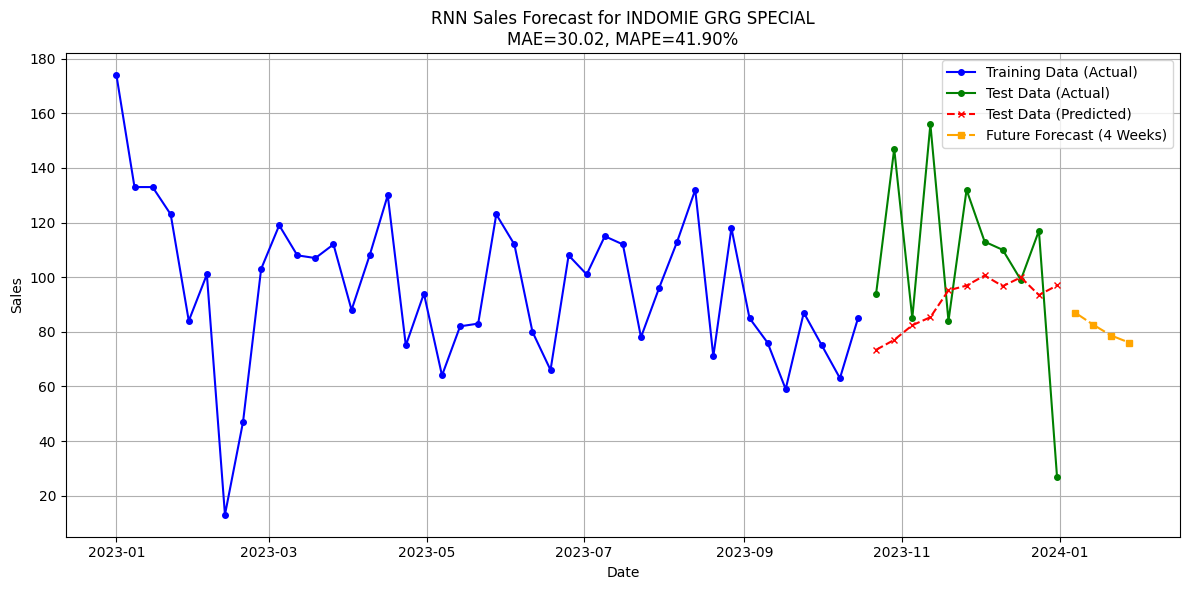


--- Memproses Produk: PUCUK HARUM TEH 350ML ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 21.39
  - MAPE: 218.53%


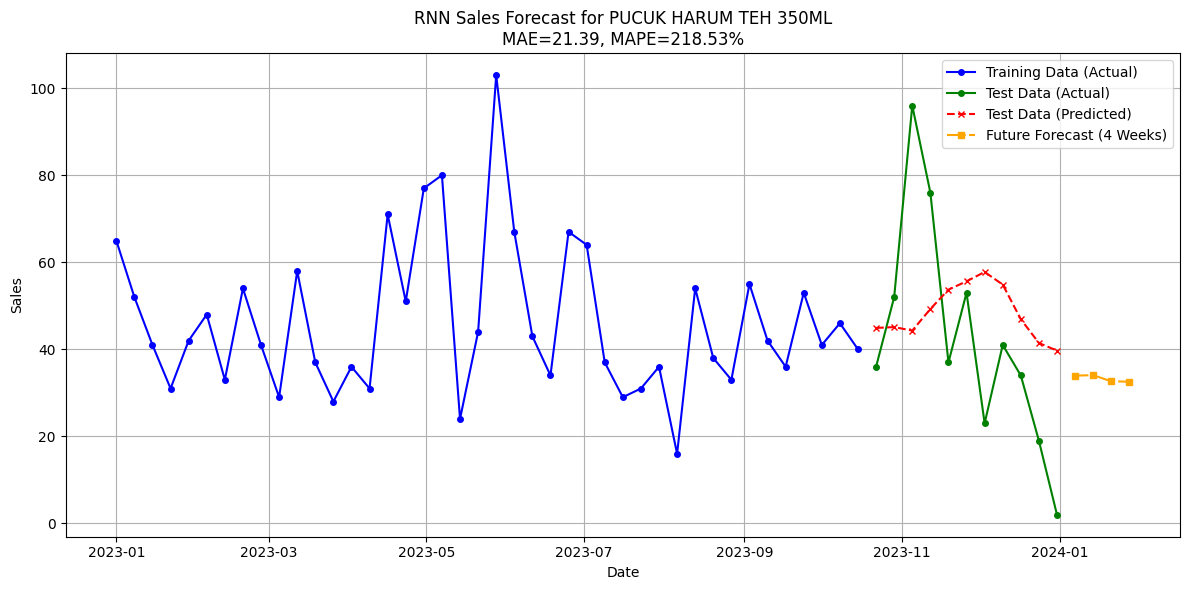


--- Memproses Produk: INDOMIE SOTO MIE ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 8.41
  - MAPE: 63.27%


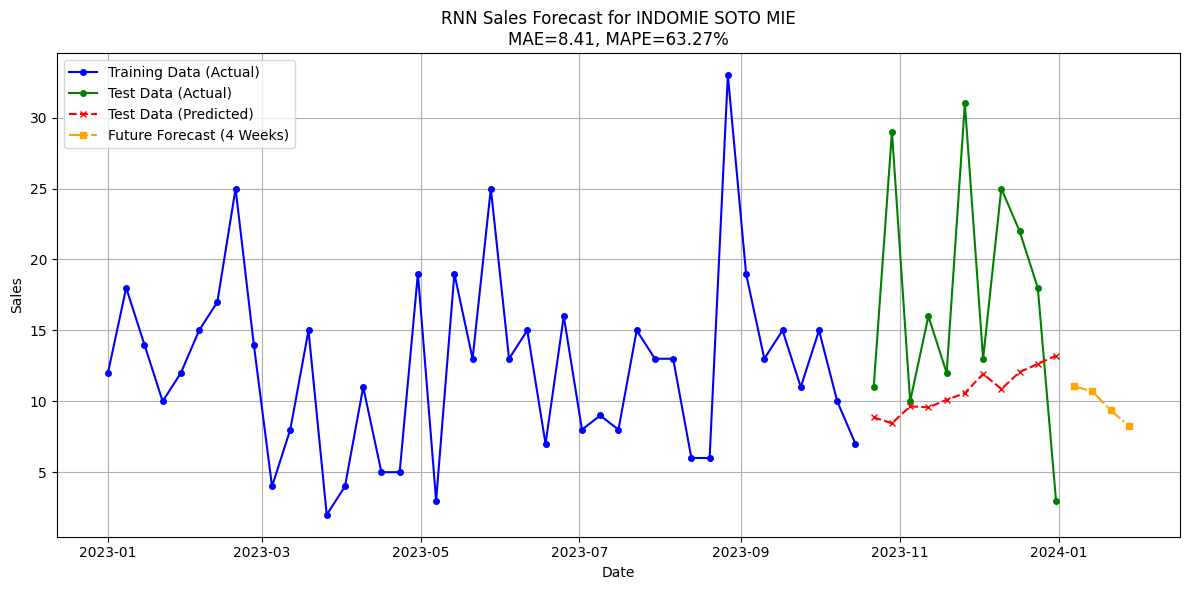


--- Memproses Produk: INDOMIE AYAM BAWANG ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 5.22
  - MAPE: 42.68%


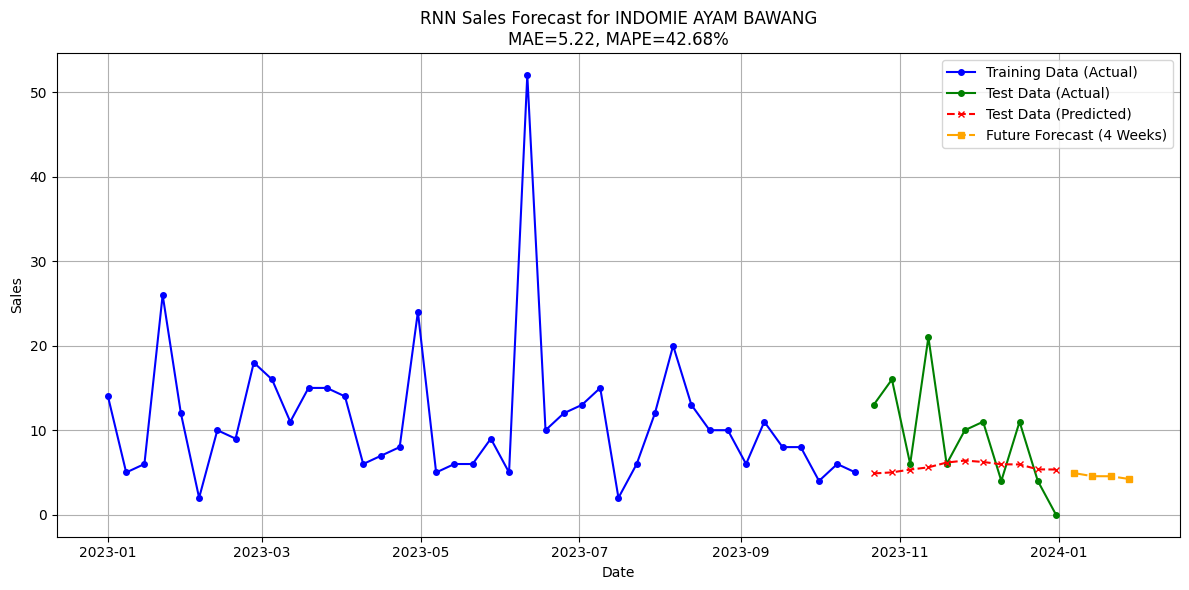


--- Memproses Produk: INDOMILK KID STR 115ML ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 10.41
  - MAPE: 58.34%


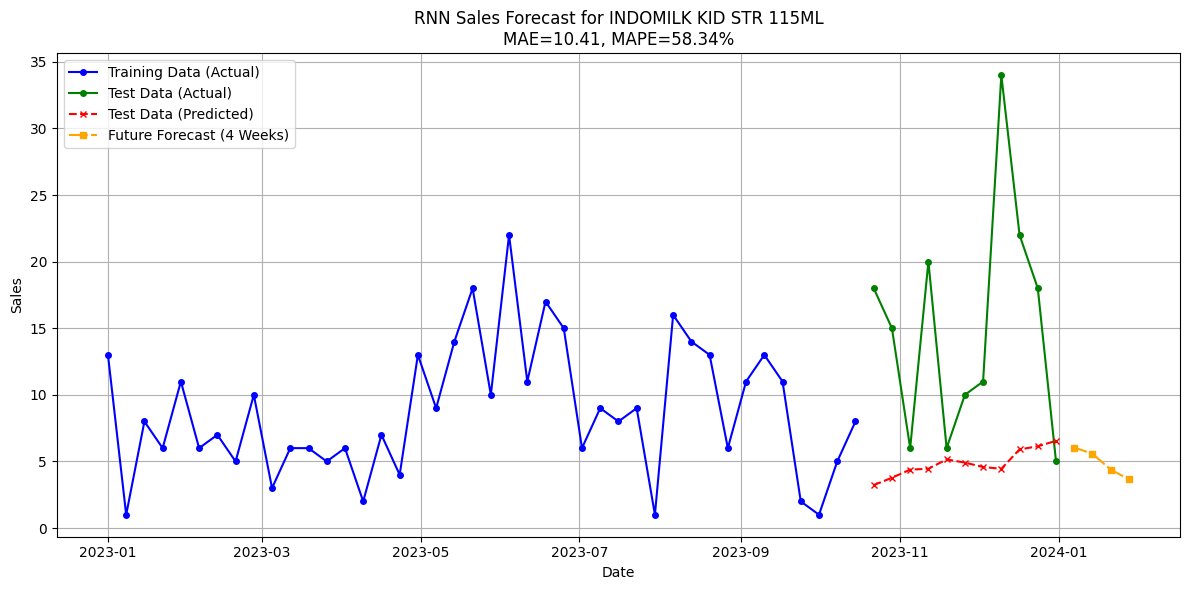


--- Memproses Produk: WALLS POPULAIRE STR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 4.69
  - MAPE: 41.07%


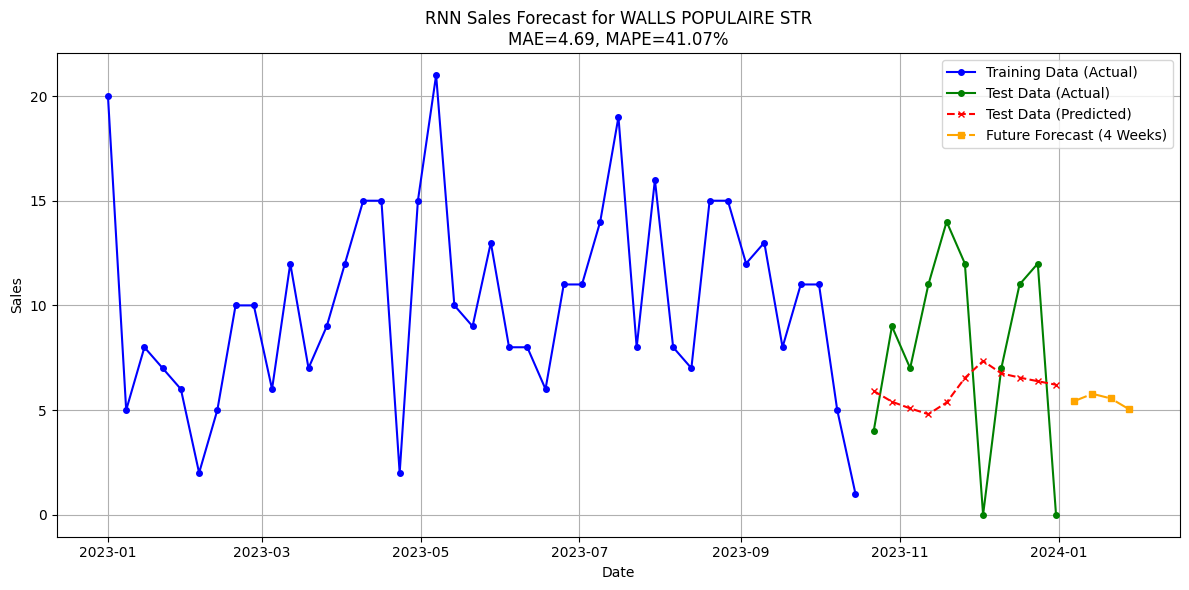


--- Memproses Produk: INDOMIE AYAM SPECIAL ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 3.45
  - MAPE: 29.23%


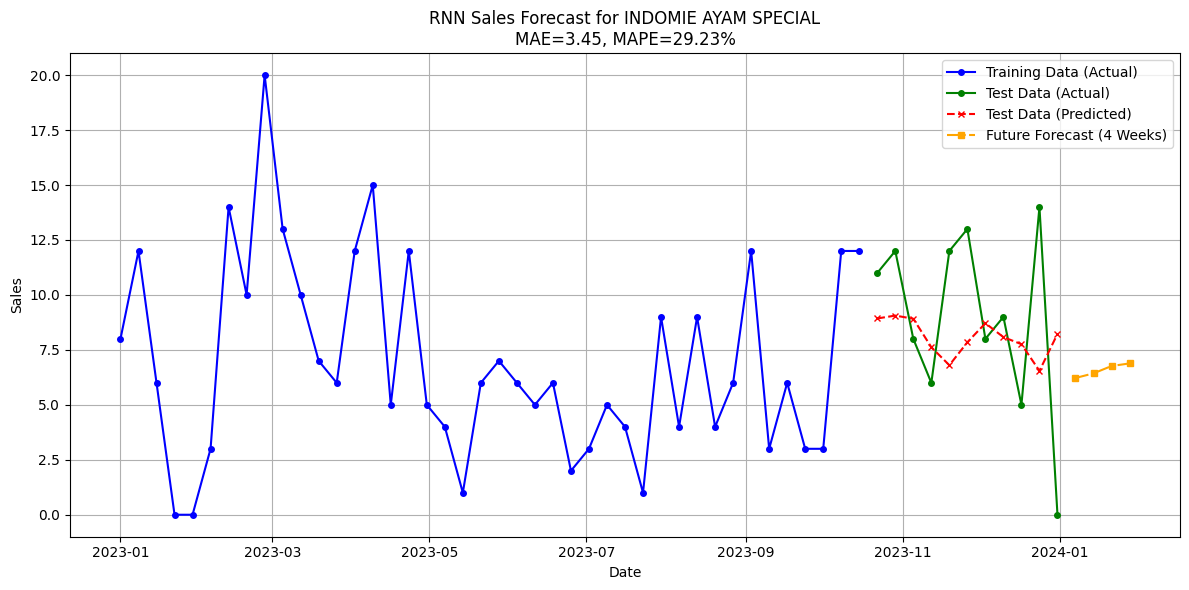


--- Memproses Produk: OREO SOFT CAKE 16GR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 5.82
  - MAPE: 89.75%


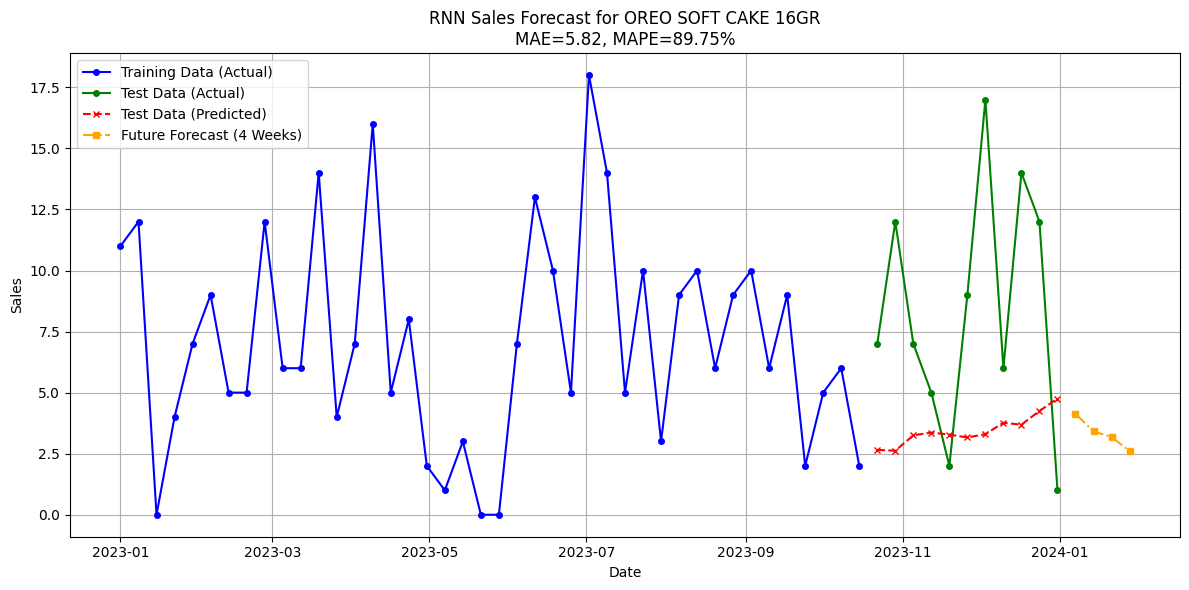


--- Memproses Produk: ROMA KELAPA 300GR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 2.89
  - MAPE: 98.60%


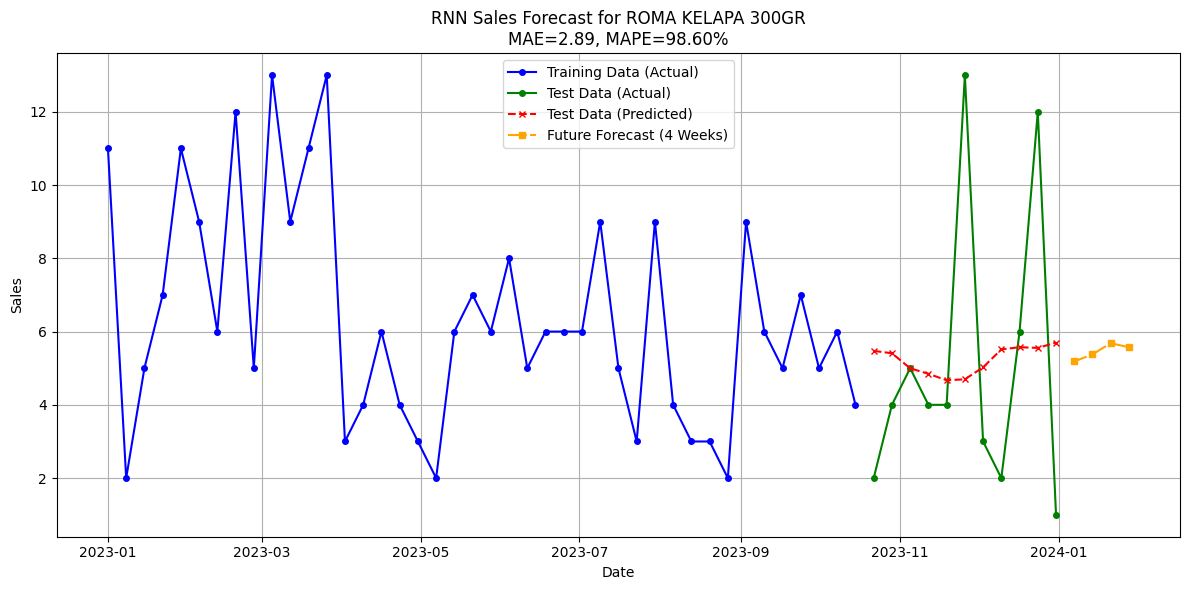


--- Memproses Produk: INDOMILK STR 190ML BTL ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 4.19
  - MAPE: 106.87%


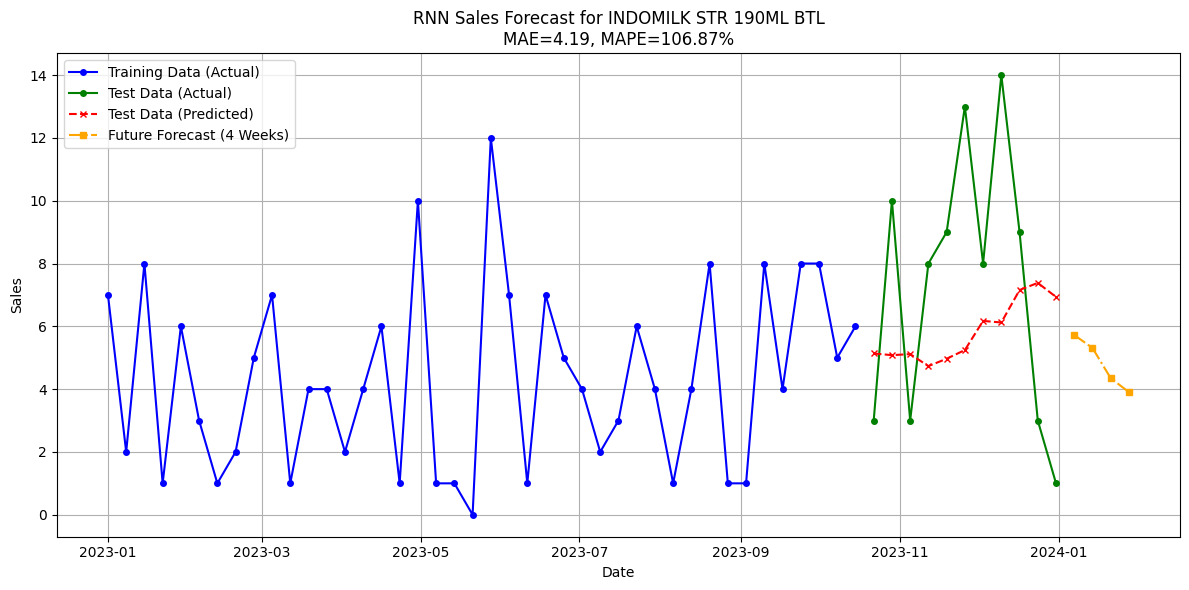


--- Memproses Produk: NUVO SOAP YLOW 72G ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 1.88
  - MAPE: 71.03%


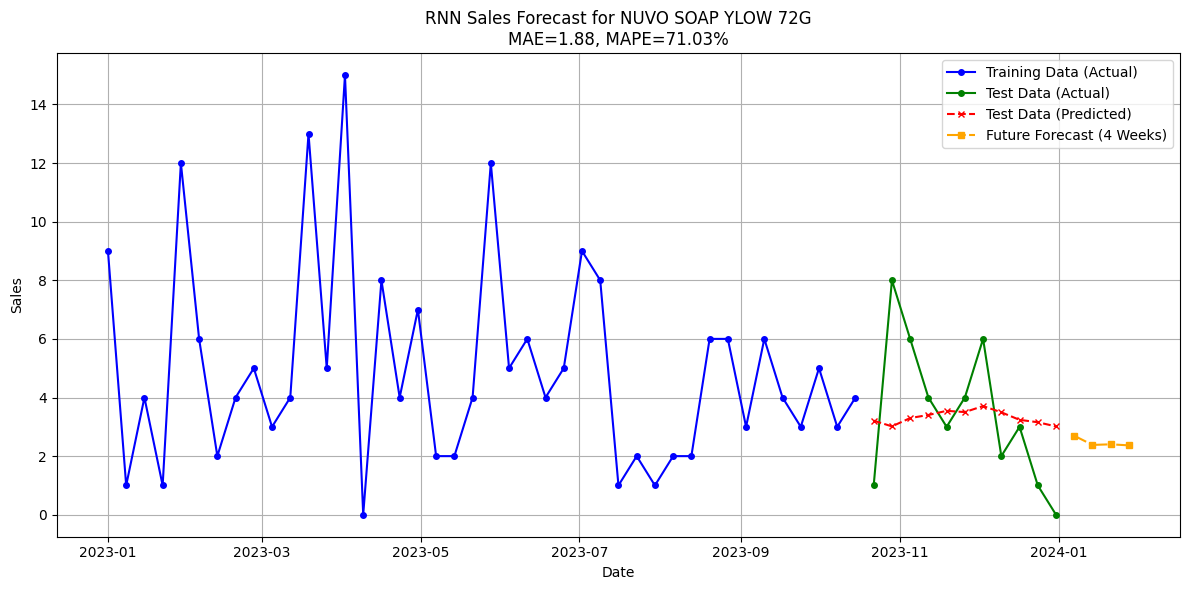


--- Memproses Produk: KRIPIK SGKG TURBO 180G ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 2.04
  - MAPE: 99.51%


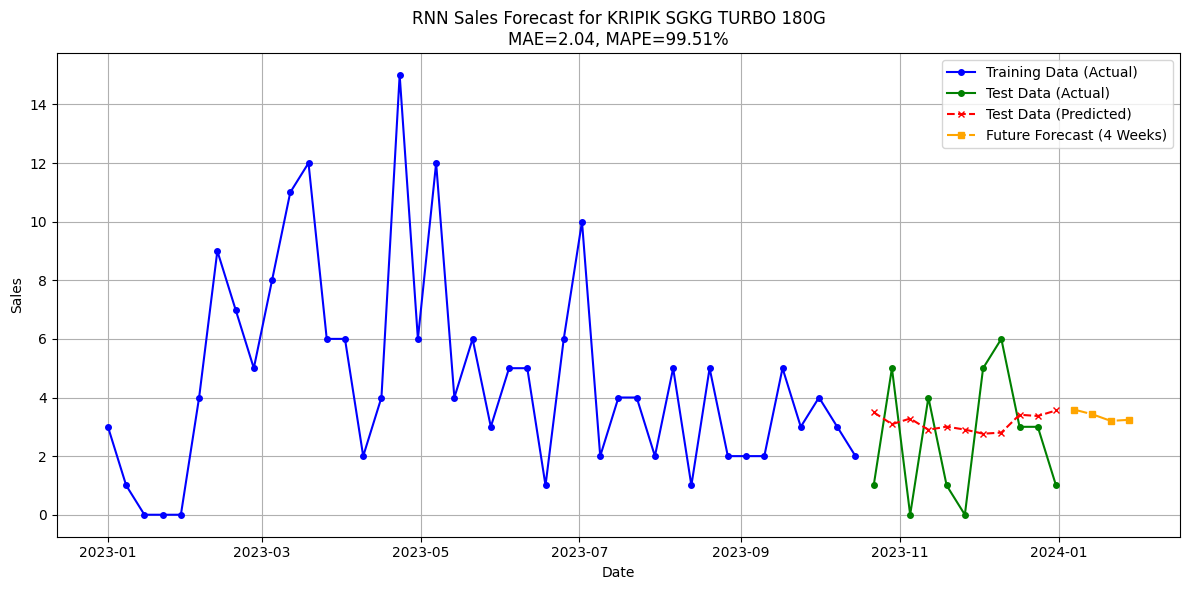


--- Memproses Produk: NUVO SOAP BLUE 72G ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 2.73
  - MAPE: 60.22%


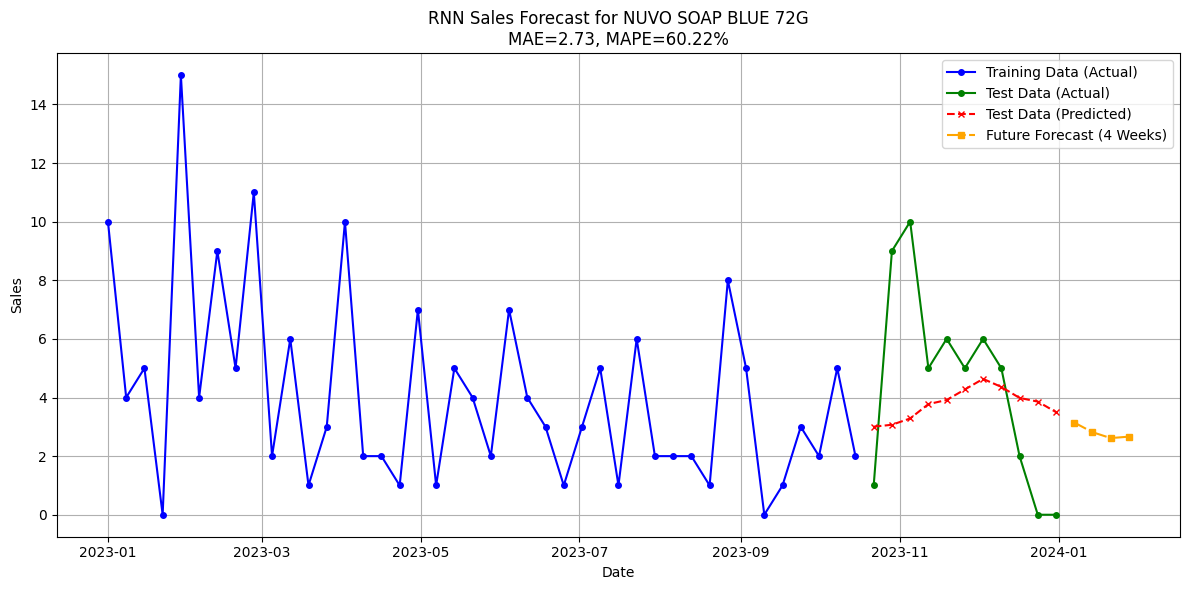


--- Memproses Produk: YA KOPI SPESIAL 60GR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 2.99
  - MAPE: 55.27%


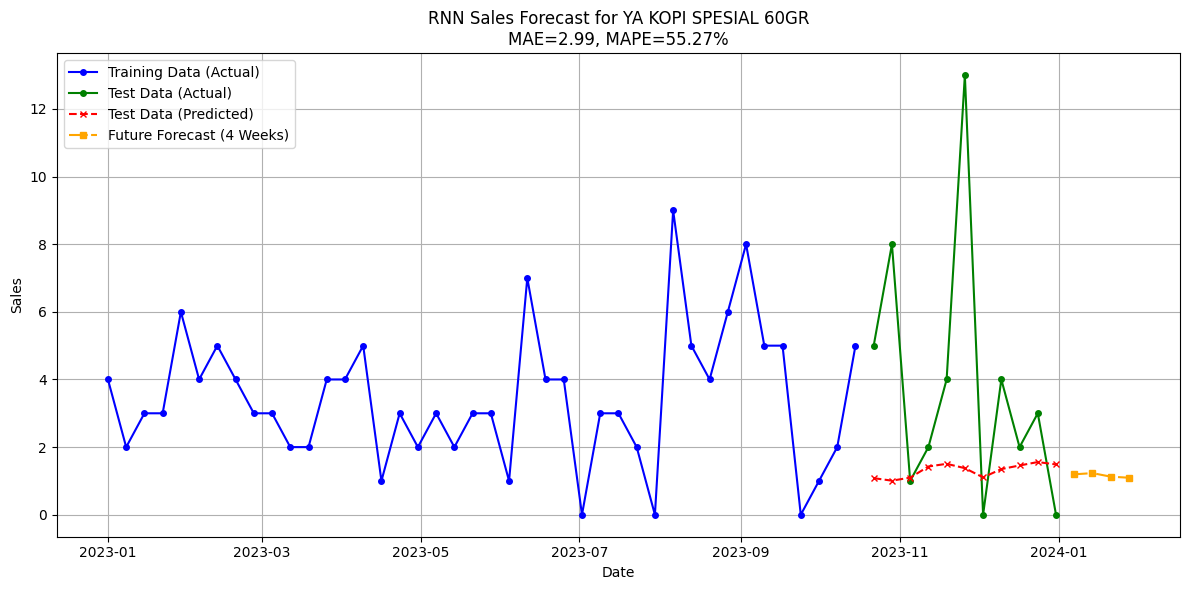



             PROSES FORECASTING DAN EVALUASI SELESAI             

--- Ringkasan Hasil Evaluasi Model (Produk dengan Akurasi Terbaik ke Terjelek) ---
                              MAE        MAPE
INDOMIE AYAM SPECIAL     3.451835   29.232114
WALLS POPULAIRE STR      4.691129   41.069017
INDOMIE GRG SPECIAL     30.015952   41.903487
INDOMIE AYAM BAWANG      5.219409   42.678598
YA KOPI SPESIAL 60GR     2.993195   55.266508
INDOMILK KID STR 115ML  10.414945   58.339531
NUVO SOAP BLUE 72G       2.730499   60.219715
INDOMIE SOTO MIE         8.409545   63.267402
NUVO SOAP YLOW 72G       1.884466   71.033707
OREO SOFT CAKE 16GR      5.816544   89.751739
ROMA KELAPA 300GR        2.892266   98.601359
KRIPIK SGKG TURBO 180G   2.042835   99.509354
INDOMILK STR 190ML BTL   4.190335  106.865603
PUCUK HARUM TEH 350ML   21.392246  218.526775

--- Performa Model Keseluruhan (Rata-rata Lintas Produk) ---
Average MAE:  7.58
Average MAPE: 76.88%

--- Prediksi Penjualan untuk 4 Minggu Ke Depan ---
    

In [34]:
# Set seed untuk reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Menonaktifkan pesan log TensorFlow yang tidak perlu
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Mute INFO dan WARNING

# --- Pra-Pemrosesan Data ---
# Kode ini sudah baik, tidak perlu diubah kecuali ada kebutuhan spesifik
if df_final.index.name == 'TANGGAL':
    df_final = df_final.reset_index()
    df_final.rename(columns={'index': 'TANGGAL'}, inplace=True)
elif 'TANGGAL' not in df_final.columns:
    df_final = df_final.reset_index()
    df_final.rename(columns={df_final.columns[0]: 'TANGGAL'}, inplace=True)

df_final['TANGGAL'] = pd.to_datetime(df_final['TANGGAL'])
product_columns = [col for col in df_final.columns if col != 'TANGGAL']

for col in product_columns:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
    df_final[col] = df_final[col].fillna(0)
    df_final[col] = np.maximum(0, df_final[col])

# --- Fungsi untuk Menghitung Metrik ---
# Kode ini sudah baik, tidak perlu diubah
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate MAPE only for non-zero actual values
    non_zero_indices = y_true != 0
    if np.sum(non_zero_indices) > 0:
        mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    else:
        mape = np.nan # Jika semua nilai aktual adalah 0, MAPE tidak terdefinisi

    return mae, mape

# --- Fungsi untuk Membuat Urutan Data untuk RNN ---
# Kode ini sudah baik, tidak perlu diubah
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# --- Hyperparameter RNN (DIUBAH) ---
LOOK_BACK = 5
LSTM_UNITS = 50 # Tetap 50, atau bisa dicoba 32/64
EPOCHS = 200 # Sedikit dinaikkan, tapi early stopping akan menghentikan jika konvergen
BATCH_SIZE = 8 # <-- INI PERUBAHAN UTAMA: Ditingkatkan dari 1 menjadi 8 (atau 16, 32)
FORECAST_HORIZON = 4
RECURRENT_DROPOUT = 0.2 # Dropout untuk unit rekuren

# --- Persiapan untuk Forecasting ---
evaluation_results = {}
future_forecasts_data_list = []

train_size = int(len(df_final) * 0.8)
test_size = len(df_final) - train_size

print("="*80)
print("             MEMULAI FORECASTING DENGAN RNN DAN EVALUASI             ")
print("="*80)
print(f"Total data historis: {len(df_final)} titik.")
print(f"Ukuran data training (80%): {train_size} titik.")
print(f"Ukuran data testing (20%): {test_size} titik.")
print(f"Look-back window (jumlah langkah input): {LOOK_BACK}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Recurrent Dropout: {RECURRENT_DROPOUT}")
print("\n")

for product in product_columns:
    # Membersihkan sesi Keras untuk memastikan model baru diinisialisasi
    tf.keras.backend.clear_session()

    print(f"\n--- Memproses Produk: {product} ---")

    product_series = df_final[product].values.reshape(-1, 1)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(product_series)

    # Memastikan ada cukup data untuk training dan testing setelah look_back
    if train_size <= LOOK_BACK + 1 or test_size < 1:
        print(f"  Peringatan: Data tidak cukup untuk look_back ({LOOK_BACK}) atau test set terlalu kecil. Melewatkan produk.")
        evaluation_results[product] = {'MAE': np.nan, 'MAPE': np.nan}
        future_forecasts_data_list.append(np.full(FORECAST_HORIZON, np.nan))
        continue

    train_scaled = scaled_data[:train_size]
    # Test data perlu mencakup LOOK_BACK dari data training sebelumnya
    test_scaled_with_history = scaled_data[train_size - LOOK_BACK:]

    # Memastikan X_train, y_train tidak kosong
    if len(train_scaled) <= LOOK_BACK:
        print(f"  Peringatan: Data training tidak cukup untuk membuat urutan. Melewatkan produk.")
        evaluation_results[product] = {'MAE': np.nan, 'MAPE': np.nan}
        future_forecasts_data_list.append(np.full(FORECAST_HORIZON, np.nan))
        continue

    X_train, y_train = create_sequences(train_scaled, LOOK_BACK)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Memastikan X_test, y_test_actual_scaled tidak kosong
    if len(test_scaled_with_history) <= LOOK_BACK:
        print(f"  Peringatan: Data testing tidak cukup untuk membuat urutan. Melewatkan produk.")
        evaluation_results[product] = {'MAE': np.nan, 'MAPE': np.nan}
        future_forecasts_data_list.append(np.full(FORECAST_HORIZON, np.nan))
        continue

    X_test, y_test_actual_scaled = create_sequences(test_scaled_with_history, LOOK_BACK)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Model RNN (DIUBAH)
    model = Sequential()
    # Hapus activation='relu' dan tambahkan recurrent_dropout
    model.add(LSTM(LSTM_UNITS, recurrent_dropout=RECURRENT_DROPOUT, input_shape=(LOOK_BACK, 1))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=0) # Patience dinaikkan sedikit

    # Melatih model
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0,
                        validation_split=0.1, callbacks=[early_stopping])

    # Membuat prediksi pada data test
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred_unscaled = scaler.inverse_transform(y_pred_scaled)
    y_test_actual_unscaled = scaler.inverse_transform(y_test_actual_scaled.reshape(-1, 1))
    
    # Mengatur nilai negatif menjadi 0
    y_pred_unscaled[y_pred_unscaled < 0] = 0

    # Menghitung metrik evaluasi
    mae, mape = calculate_metrics(y_test_actual_unscaled.flatten(), y_pred_unscaled.flatten())

    print(f"  - MAE: {mae:.2f}")
    if pd.isna(mape):
        print(f"  - MAPE: N/A (Semua nilai aktual adalah 0 di periode testing)")
    else:
        print(f"  - MAPE: {mape:.2f}%")

    evaluation_results[product] = {
        'MAE': mae,
        'MAPE': mape
    }

    # Melakukan forecasting masa depan (iteratif)
    current_input = scaled_data[-LOOK_BACK:].reshape(1, LOOK_BACK, 1) # Ambil LOOK_BACK data terakhir
    product_future_forecast_scaled = []
    for _ in range(FORECAST_HORIZON):
        predicted_scaled = model.predict(current_input, verbose=0)[0, 0]
        product_future_forecast_scaled.append(predicted_scaled)
        # Update input untuk prediksi berikutnya (geser jendela waktu)
        new_val_reshaped = np.array([[[predicted_scaled]]])
        current_input = np.concatenate((current_input[:, 1:, :], new_val_reshaped), axis=1)

    product_future_forecast_unscaled = scaler.inverse_transform(np.array(product_future_forecast_scaled).reshape(-1, 1))
    product_future_forecast_unscaled[product_future_forecast_unscaled < 0] = 0

    future_forecasts_data_list.append(product_future_forecast_unscaled.flatten())

    # --- Visualisasi ---
    plt.figure(figsize=(12, 6))
    
    # Data Training Aktual
    plt.plot(df_final['TANGGAL'].iloc[:train_size], product_series[:train_size], 
             label='Training Data (Actual)', color='blue', marker='o', markersize=4, linestyle='-')
    
    # Data Testing Aktual
    # Pastikan rentang indeks sesuai dengan panjang y_test_actual_unscaled
    test_actual_start_idx = train_size
    test_actual_end_idx = train_size + len(y_test_actual_unscaled)
    plt.plot(df_final['TANGGAL'].iloc[test_actual_start_idx:test_actual_end_idx], 
             product_series[test_actual_start_idx:test_actual_end_idx], 
             label='Test Data (Actual)', color='green', marker='o', markersize=4, linestyle='-')
    
    # Data Testing Prediksi
    test_dates_for_pred = df_final['TANGGAL'].iloc[test_actual_start_idx:test_actual_end_idx]
    plt.plot(test_dates_for_pred, y_pred_unscaled.flatten(), 
             label='Test Data (Predicted)', color='red', marker='x', markersize=4, linestyle='--')
    
    # Prediksi Masa Depan
    last_historical_date = df_final['TANGGAL'].iloc[-1]
    # Asumsi Anda ingin memprediksi setiap minggu setelah data terakhir
    future_dates = pd.date_range(start=last_historical_date + pd.Timedelta(weeks=1), periods=FORECAST_HORIZON, freq='W')
    plt.plot(future_dates,
             product_future_forecast_unscaled.flatten(), 
             label=f'Future Forecast ({FORECAST_HORIZON} Weeks)', color='orange', marker='s', markersize=4, linestyle='-.')
    
    plt.title(f'RNN Sales Forecast for {product}\nMAE={mae:.2f}, MAPE={mape:.2f}%')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Buat DataFrame untuk prediksi masa depan (setelah semua loop selesai)
last_historical_date_actual_df = df_final['TANGGAL'].iloc[-1]
future_dates_df_index = pd.date_range(start=last_historical_date_actual_df + pd.Timedelta(weeks=1), periods=FORECAST_HORIZON, freq='W')
future_forecasts_df = pd.DataFrame(np.array(future_forecasts_data_list).T, columns=product_columns, index=future_dates_df_index)
future_forecasts_df.index.name = 'TANGGAL'


print("\n")
print("="*80)
print("             PROSES FORECASTING DAN EVALUASI SELESAI             ")
print("="*80)

# --- 4. Ringkasan Hasil Evaluasi dan Prediksi ---
print("\n--- Ringkasan Hasil Evaluasi Model (Produk dengan Akurasi Terbaik ke Terjelek) ---")

eval_df_summary = pd.DataFrame.from_dict(evaluation_results, orient='index')
# Sort by MAPE (asc) then MAE (asc)
eval_df_summary_sorted = eval_df_summary.sort_values(by=['MAPE', 'MAE'], ascending=True)

print(eval_df_summary_sorted.to_string())

# --- Tambahkan Ringkasan Metrik Keseluruhan di sini ---
print("\n--- Performa Model Keseluruhan (Rata-rata Lintas Produk) ---")
# Hitung rata-rata hanya untuk nilai yang bukan NaN
overall_mae = eval_df_summary_sorted['MAE'].mean()
overall_mape = eval_df_summary_sorted['MAPE'].mean()

print(f"Average MAE:  {overall_mae:.2f}")
if pd.isna(overall_mape):
    print("Average MAPE: N/A (Satu atau lebih produk memiliki semua nilai aktual nol di test set)")
else:
    print(f"Average MAPE: {overall_mape:.2f}%")
# --- Akhir Penambahan ---

print(f"\n--- Prediksi Penjualan untuk {FORECAST_HORIZON} Minggu Ke Depan ---")
print(future_forecasts_df.to_string())
